**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Alex Russell
- Varun Dinesh
- Jamal Karim
- Haohan Zou
- Sydnie Schlagheck

# Research Question


What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)

Is there a relationship between whether an NFL team plays on their home field and the margin by which the team wins or loses?

## Background and Prior Work


Background: The National Football League (NFL) is a professional league where all the best American football players compete. The league spans all of the United States and is divided up into 32 teams. In this data analysis we examine how much of an impact home field advantage applies to the home team winning the game, if at all. We also analyze by what margin of victory or loss the home team exhibits. Home field advantage is a common concept amongst all sports where some fans believe that the home team gains many advantages. One of the factors is not having to travel long distances for games the night or two nights before and being familiar with your home atmosphere. Another factor is the support and amount of fans. An example of this being relevant could be: when on the offensive side of the ball, fans lower their voices so the players can hear their coaches and leaders on the field, and in the same respect, when the home team is on defense, the fans raise their voices and become extremely loud so the visiting team can’t enjoy those luxuries. A side product of the fans also may impact the referees as they are pressured into doing what the home fans want.

Prior Work: One piece of work looked at the value being home field advantage and predicting its effectiveness for the 2023 season. The study found that home field advantage in recent years has been trending downward. The base advantage that home field offers is usually 3 points but the study predicted it to go down to 1.4 for the 2023 season. https://www.covers.com/nfl/home-field-advantage

Another piece of work looked at why home field advantage hasn’t been as effective as it used to be. The two main factors that this study examined were travel and the fans. Travel takes a huge toll on players both physically and mentally, but with new leaps of medicine, players have been able to reduce the effect travel has on their bodies. The study also found that fans had a significant impact on the players. While positive energy from the home team did help players, the study also mentioned that players would be too worried about letting down the fans that they end up costing themselves the win. According to this study, fans also had an effect through referees, who would more often make calls in favor of the home team. However, because of recent rule changes such as the ability to review calls, this effect has decreased. https://www.discovermagazine.com/mind/why-the-home-field-advantage-is-on-the-decline

A third piece of work examined home-field advantage but from a view of individual NFL teams. It considers some confounding variables like weather, noise, and time zone. It also cites specific teams’ records and argues that certain teams actually do have a home field advantage, and that others do not necessarily have one. Some reasons that they thought could explain these advantages were that certain teams adapted more easily, time zone travel could hurt West coast teams, traction on the fields, and more. https://www.the33rdteam.com/category/analysis/which-nfl-teams-actually-have-home-field-advantage/ 


# Hypothesis



- Include your team's hypothesis
- Ensure that this hypothesis is clear to readers
- Explain why you think this will be the outcome (what was your thinking?)

What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)
- We believe that there will be a statistically significant advantage for the home team. We estimate that the home team will score an average of 5 points higher at home than away.
- We came to this hypothesis because we believe that familiarity with the home conditions and stadium could improve performance. Also, more fans could attend home games, elevating the morale of the home team in significant ways. We chose 5 because we think that the home team could be improved by almost a touchdown (6 points).

# Data

## Project Proposal's Planned/Ideal Dataset:

The data that we want should include the game history with variables that include the name of the home team, away team, the score of the game, the date of the game, and a column for which team won the game. Potentially we want to broaden our analysis on this topic to include other environmental factors such as the weather conditions (is it raining, snowing, or fair?) and the type of stadium that the game was played in (open, closed, occupancy). 

We found a starting dataset that gives us the game history from the 1990’s that includes many columns including the home team name, away team name, the date of the game played, the score of the game, an indicator of the team that won, and other potentially important information of features including the time of the game, the location, money-lines, and stadium name. The dataset comes from the Github of nfl verse which is a collection of data and R packages for NFL analytics. There’s about 5,000 observations where each observation represents a game between two teams. Potentially, we want to find another dataset to explore other potential environmental factors; for example, a dataset that includes the attendance of games/seasons that we can merge into the dataset that we already have. 



In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = 'plotly'
from scipy.stats import ks_2samp
import plotly.figure_factory as ff
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

## Data overview:

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- Dataset #2 (if you have more than one!)
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- etc

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

 ## Dataset \#1: NFL Data Dataset

Dataset 1: https://github.com/nflverse/nfldata/blob/master/data/games.csv

Number of observations: 6693 / Number of variables: 46

This dataset contains info about every NFL game since 1999. Some important variables include what the home and away teams are, location, final scores, and even stadium/weather information. Some data types included are strings, dates, and numerical values (ints and floats). The concepts that the data are proxies for include team performance, game outcome, etc. To wrangle, clean, and preprocess this data, we would first load the csv, then drop unnecessary columns, and then finally address observations that are invalid/unhelpful/otherwise unwanted.


In [256]:
 ## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
 ## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

In [257]:
# load the data csv into DataFrame df
df = pd.read_csv('Datasets/games1.csv')
print(df.shape)
pd.set_option("display.max_columns", 46)
df.head()
#df1['overtime'].value_counts()

(6693, 46)


,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,ftn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,1999091210,598.0,NaN,199909120atl,NaN,190912001,NaN,7,7,NaN,NaN,-4.0,NaN,NaN,49.0,NaN,NaN,0,dome,astroturf,NaN,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,1999091206,597.0,NaN,199909120chi,NaN,190912003,NaN,7,7,NaN,NaN,-3.0,NaN,NaN,38.0,NaN,NaN,0,outdoors,grass,80.0,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,1999091213,604.0,NaN,199909120cle,NaN,190912005,NaN,7,7,NaN,NaN,-6.0,NaN,NaN,37.0,NaN,NaN,1,outdoors,grass,78.0,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,1999091208,602.0,NaN,199909120gnb,NaN,190912009,NaN,7,7,NaN,NaN,9.0,NaN,NaN,43.0,NaN,NaN,0,outdoors,grass,67.0,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,1999091202,591.0,NaN,199909120clt,NaN,190912011,NaN,7,7,NaN,NaN,-3.0,NaN,NaN,45.5,NaN,NaN,1,dome,astroturf,NaN,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome


In [258]:
print("Data1: ", df.columns)

Data1:  Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'ftn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')


In [259]:
# get rid of unnecessary columns
df = df[['game_id', 'season', 'game_type', 'gameday', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'spread_line','div_game',
       'roof', 'temp', 'wind', 'stadium_id', 'stadium']]
print(df.shape)
df.head()

(6693, 19)


,game_id,season,game_type,gameday,away_team,away_score,home_team,home_score,location,result,total,overtime,spread_line,div_game,roof,temp,wind,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1999-09-12,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,-4.0,0,dome,NaN,NaN,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1999-09-12,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,-3.0,0,outdoors,80.0,12.0,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1999-09-12,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,-6.0,1,outdoors,78.0,12.0,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1999-09-12,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,9.0,0,outdoors,67.0,10.0,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1999-09-12,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,-3.0,1,dome,NaN,NaN,IND99,RCA Dome


In [260]:
#look into invalid/missing values; address these
df['season'].value_counts()
df = df[df['season']<2023]
df.shape
df['location'].value_counts()

# exclude non-regular season games since they introduce more factors/biases,
# such as matches like SuperBowls always being played in a neutral stadium
#df['game_type'].value_counts()
df = df[df['game_type']=='REG']
#df = df[df['location']=='Home']
df.shape

df.isna().any()
# the weather data seems to have some missing data, 
# but since these are not currently planned to be central to our analysis,
# we'll leave these unaddressed for now

game_id        False
season         False
game_type      False
gameday        False
away_team      False
away_score     False
home_team      False
home_score     False
location       False
result         False
total          False
overtime       False
spread_line    False
div_game       False
roof           False
temp            True
wind            True
stadium_id     False
stadium        False
dtype: bool

In [261]:
# we want to trim dataset to only include years recorded in our second dataset
df['season'].value_counts()
df = df[(df['season']<2020) & (df['season']>1999)]
print(df.shape)
df
# this leaves 5104 regular games between 2000 and 2019 (inclusive)

(5104, 19)


,game_id,season,game_type,gameday,away_team,away_score,home_team,home_score,location,result,total,overtime,spread_line,div_game,roof,temp,wind,stadium_id,stadium
259,2000_01_SF_ATL,2000,REG,2000-09-03,SF,28.0,ATL,36.0,Home,8.0,64.0,0.0,6.5,1,dome,NaN,NaN,ATL00,Georgia Dome
260,2000_01_JAX_CLE,2000,REG,2000-09-03,JAX,27.0,CLE,7.0,Home,-20.0,34.0,0.0,-10.5,1,outdoors,78.0,6.0,CLE00,Cleveland Browns Stadium
261,2000_01_IND_KC,2000,REG,2000-09-03,IND,27.0,KC,14.0,Home,-13.0,41.0,0.0,-3.5,0,outdoors,90.0,5.0,KAN00,Arrowhead Stadium
262,2000_01_CHI_MIN,2000,REG,2000-09-03,CHI,27.0,MIN,30.0,Home,3.0,57.0,0.0,4.5,1,dome,NaN,NaN,MIN00,Hubert H. Humphrey Metrodome
263,2000_01_TB_NE,2000,REG,2000-09-03,TB,21.0,NE,16.0,Home,-5.0,37.0,0.0,-3.0,0,outdoors,71.0,5.0,BOS99,Foxboro Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,2019_17_TEN_HOU,2019,REG,2019-12-29,TEN,35.0,HOU,14.0,Home,-21.0,49.0,0.0,-10.0,1,closed,NaN,NaN,HOU00,NRG Stadium
5568,2019_17_IND_JAX,2019,REG,2019-12-29,IND,20.0,JAX,38.0,Home,18.0,58.0,0.0,-5.0,1,outdoors,NaN,NaN,JAX00,TIAA Bank Stadium
5569,2019_17_ARI_LA,2019,REG,2019-12-29,ARI,24.0,LA,31.0,Home,7.0,55.0,0.0,7.0,1,outdoors,62.0,0.0,LAX99,Los Angeles Memorial Coliseum
5570,2019_17_PHI_NYG,2019,REG,2019-12-29,PHI,34.0,NYG,17.0,Home,-17.0,51.0,0.0,-4.0,1,outdoors,42.0,5.0,NYC01,MetLife Stadium


### Visualizations for Dataset \#1

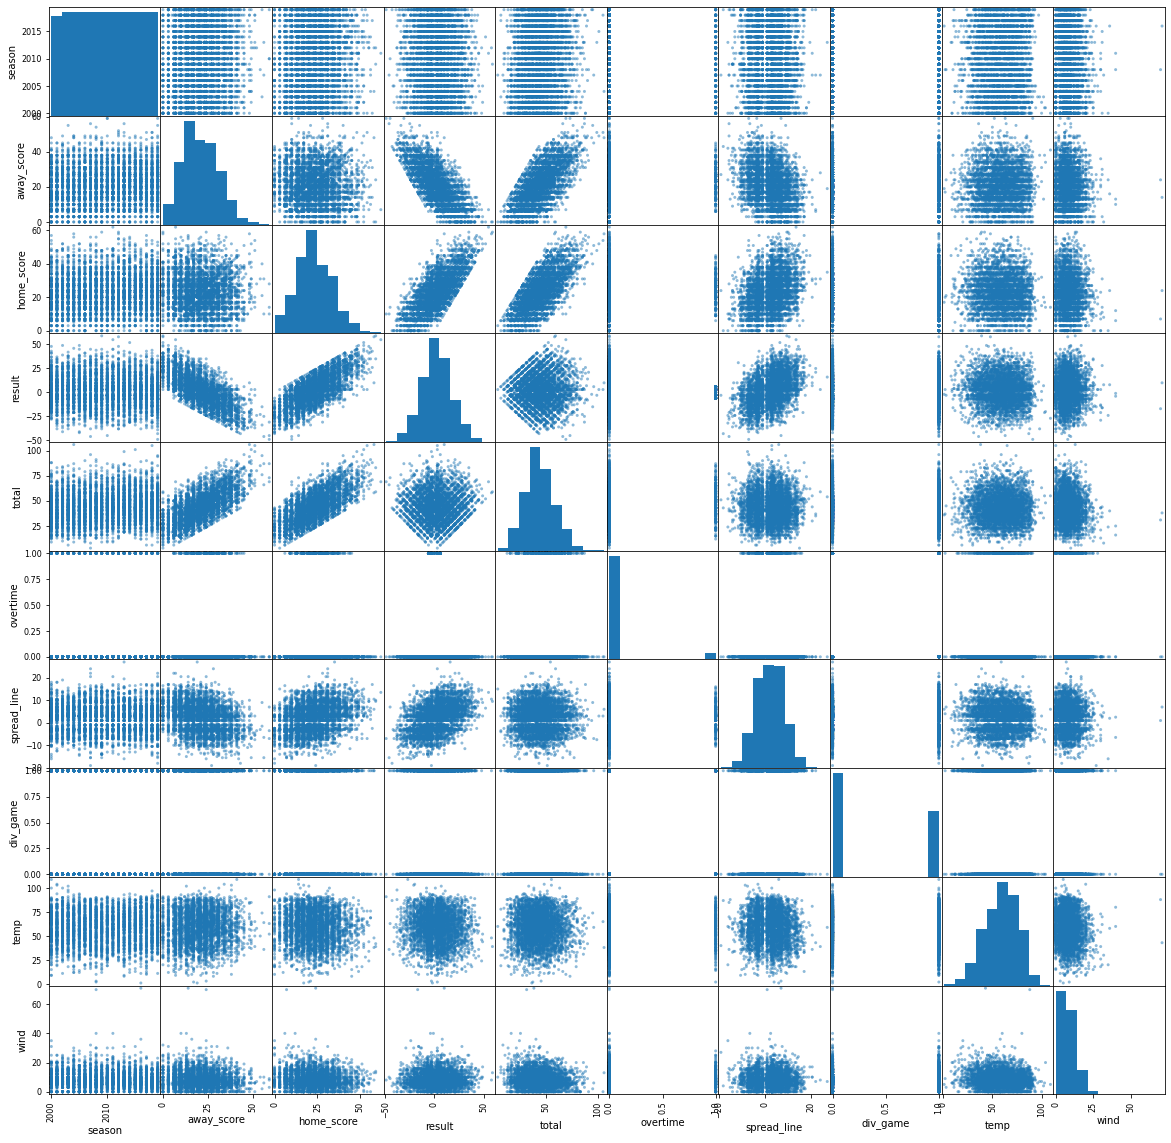

In [262]:
fig = pd.plotting.scatter_matrix(df,figsize=(20,20))

In [263]:
print("Mean points difference for home games: ", df['result'].mean())
print("Median points difference for home games: ", df['result'].median())

Mean points difference for home games:  2.356387147335423
Median points difference for home games:  3.0


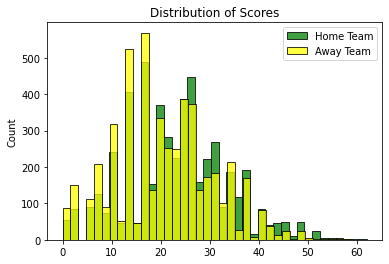

In [264]:
home_scores = df['home_score'].to_numpy()
away_scores = df['away_score'].to_numpy()

sns.histplot(home_scores, color='green', label='Home Team')
sns.histplot(away_scores, color='yellow', label='Away Team')
plt.legend()
plt.title('Distribution of Scores')
plt.show()

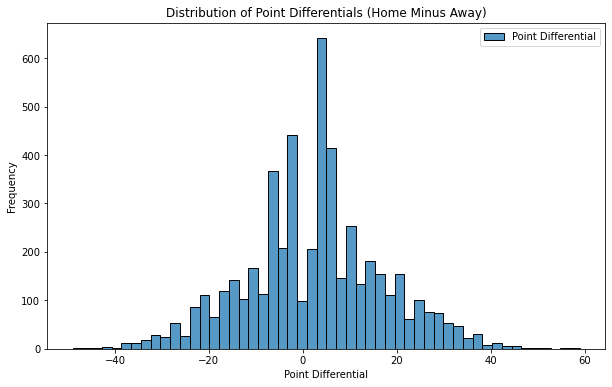

In [265]:
df['point_differential'] = df['home_score'] - df['away_score']

plt.figure(figsize=(10, 6))
sns.histplot(df['point_differential'], label='Point Differential')
plt.title('Distribution of Point Differentials (Home Minus Away)')
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.legend()
plt.show() 

## Dataset \#2: Stadium Dataset 

Dataset 2: https://www.kaggle.com/datasets/sujaykapadnis/nfl-stadium-attendance-dataset (attendance.csv and games.csv)

Number of observations: 10846 / Number of variables: 8 (each games appears twice: once for each participating team)

This dataset provides info about attendance at NFL games. Some important variables include team, home and away attendance, and weekly attendance. The teams and team home locations are strings, and the other variables like year and total are integers. The integer values for attendance are proxies for engagement and how many fans support either side.

How we plan to use Datasets \#1 and \#2 datasets together: These datasets will be combined because the first dataset’s correlation between score and home-field advantage will be a baseline for the second dataset’s correlation between score and stadium attendance to be compared to. It will allow us to investigate whether stadium attendance can be a confounding variable affecting a team's performance. 


In [266]:
# Import two csv files from dataset

stadium = pd.read_csv("Datasets/attendance.csv")
print(stadium.shape)
stadium.head()

(10846, 8)


,team,team_name,year,total,home,away,week,weekly_attendance
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434.0
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009.0
2,Arizona,Cardinals,2000,893926,387475,506451,3,NaN
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801.0
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985.0


In [267]:
games = pd.read_csv("Datasets/games.csv")
print(games.shape)
games.head()

(5324, 19)


,year,week,home_team,away_team,winner,tie,day,date,time,pts_win,pts_loss,yds_win,turnovers_win,yds_loss,turnovers_loss,home_team_name,home_team_city,away_team_name,away_team_city
0,2000,1,Minnesota Vikings,Chicago Bears,Minnesota Vikings,NaN,Sun,September 3,1:00PM,30,27,374,1,425,1,Vikings,Minnesota,Bears,Chicago
1,2000,1,Kansas City Chiefs,Indianapolis Colts,Indianapolis Colts,NaN,Sun,September 3,1:00PM,27,14,386,2,280,1,Chiefs,Kansas City,Colts,Indianapolis
2,2000,1,Washington Redskins,Carolina Panthers,Washington Redskins,NaN,Sun,September 3,1:01PM,20,17,396,0,236,1,Redskins,Washington,Panthers,Carolina
3,2000,1,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,NaN,Sun,September 3,1:02PM,36,28,359,1,339,1,Falcons,Atlanta,49ers,San Francisco
4,2000,1,Pittsburgh Steelers,Baltimore Ravens,Baltimore Ravens,NaN,Sun,September 3,1:02PM,16,0,336,0,223,1,Steelers,Pittsburgh,Ravens,Baltimore


In [268]:
# See missing values in the dataset
stadium.isna().sum()

team                   0
team_name              0
year                   0
total                  0
home                   0
away                   0
week                   0
weekly_attendance    638
dtype: int64

In [269]:
games.isna().sum()

year                 0
week                 0
home_team            0
away_team            0
winner               0
tie               5314
day                  0
date                 0
time                 0
pts_win              0
pts_loss             0
yds_win              0
turnovers_win        0
yds_loss             0
turnovers_loss       0
home_team_name       0
home_team_city       0
away_team_name       0
away_team_city       0
dtype: int64

In games dataset, we have seen that column 'tie' uses NaN to represent the games without a tie. At here, we will modify that columns into boolean datatype, where True represents a tie result happens and False otherwise. 

In [270]:
# replace NaN with a more suitable value
games['tie'] = games['tie'].fillna(False)
games['tie'] = games['tie'].apply(lambda x: x if not x else False)
games.isna().sum()

year              0
week              0
home_team         0
away_team         0
winner            0
tie               0
day               0
date              0
time              0
pts_win           0
pts_loss          0
yds_win           0
turnovers_win     0
yds_loss          0
turnovers_loss    0
home_team_name    0
home_team_city    0
away_team_name    0
away_team_city    0
dtype: int64

In [271]:
# removes observations where the team had a bye
stadium= stadium.loc[~stadium['weekly_attendance'].isna()]
stadium.isna().sum()
stadium.head()

,team,team_name,year,total,home,away,week,weekly_attendance
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434.0
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009.0
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801.0
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985.0
5,Arizona,Cardinals,2000,893926,387475,506451,6,44296.0


In games dataset, since we don't care much about detail stats of the game, so we will only keep stats about score and final results.

In [272]:
# drop unnecessary columns
games_1 = games.drop(columns = ['time', 'turnovers_win', 'turnovers_loss', 'yds_win', 'yds_loss', 'home_team_name', 'home_team_city', 'away_team_name','away_team_city'])
games_cleaned = games_1.rename(columns = {"day": "day_of_week"})
sign = (games_cleaned['home_team'] == games_cleaned['winner']).apply(lambda x: 1 if x else -1)
games_cleaned['points_diff'] = (games_cleaned['pts_win'] - games_cleaned['pts_loss']) * sign
games_cleaned.head()

,year,week,home_team,away_team,winner,tie,day_of_week,date,pts_win,pts_loss,points_diff
0,2000,1,Minnesota Vikings,Chicago Bears,Minnesota Vikings,False,Sun,September 3,30,27,3
1,2000,1,Kansas City Chiefs,Indianapolis Colts,Indianapolis Colts,False,Sun,September 3,27,14,-13
2,2000,1,Washington Redskins,Carolina Panthers,Washington Redskins,False,Sun,September 3,20,17,3
3,2000,1,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,False,Sun,September 3,36,28,8
4,2000,1,Pittsburgh Steelers,Baltimore Ravens,Baltimore Ravens,False,Sun,September 3,16,0,-16


We will only keep the team name without the team city in stadium dataset

In [273]:
stadium_cleaned = stadium.copy()
stadium_cleaned['team_name'] = stadium['team'] + " " + stadium['team_name']
#stadium_cleaned= stadium.drop(columns ='team')
stadium_cleaned.head()

,team,team_name,year,total,home,away,week,weekly_attendance
0,Arizona,Arizona Cardinals,2000,893926,387475,506451,1,77434.0
1,Arizona,Arizona Cardinals,2000,893926,387475,506451,2,66009.0
3,Arizona,Arizona Cardinals,2000,893926,387475,506451,4,71801.0
4,Arizona,Arizona Cardinals,2000,893926,387475,506451,5,66985.0
5,Arizona,Arizona Cardinals,2000,893926,387475,506451,6,44296.0


In [274]:
# Remove any non-regular season games
games_modified = games_cleaned[games_cleaned['week'].str.isdigit()]
games_modified.shape

(5104, 11)

Now, we hope to link these two datasets together so that we can have one dataset that contains both the number of attendance and the final results of the game.

In [275]:
games_temp = games_modified.copy()
games_temp['key'] = games_temp['home_team'] + ' ' + games_temp['year'].astype(str) + ' ' + games_temp['week'].astype(str)

stadium_temp = stadium_cleaned.copy()
stadium_temp['key'] = stadium_temp['team_name'] + ' ' + stadium_temp['year'].astype(str) + ' ' + stadium_temp['week'].astype(str)

complete_df = games_temp.merge(stadium_temp, left_on = 'key', right_on = 'key')
complete_df = complete_df.drop(columns = ['key', 'week_y', 'year_y', 'day_of_week', 'team_name'])
complete_df = complete_df.rename(columns = {'year_x': 'year', 'week_x': 'week'})
complete_df
# now, like Dataset \#1, Dataset \#2 has 5104 regular games between 2000 and 2019 (inclusive)

,year,week,home_team,away_team,winner,tie,date,pts_win,pts_loss,points_diff,team,total,home,away,weekly_attendance
0,2000,1,Minnesota Vikings,Chicago Bears,Minnesota Vikings,False,September 3,30,27,3,Minnesota,1029262,513322,515940,64104.0
1,2000,1,Kansas City Chiefs,Indianapolis Colts,Indianapolis Colts,False,September 3,27,14,-13,Kansas City,1115272,631365,483907,78357.0
2,2000,1,Washington Redskins,Carolina Panthers,Washington Redskins,False,September 3,20,17,3,Washington,1174332,647424,526908,80257.0
3,2000,1,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,False,September 3,36,28,8,Atlanta,964579,422814,541765,54626.0
4,2000,1,Pittsburgh Steelers,Baltimore Ravens,Baltimore Ravens,False,September 3,16,0,-16,Pittsburgh,987037,440426,546611,55049.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,2019,17,New York Giants,Philadelphia Eagles,Philadelphia Eagles,False,December 29,34,17,-17,New York,1143109,597316,545793,75029.0
5100,2019,17,Dallas Cowboys,Washington Redskins,Dallas Cowboys,False,December 29,47,16,31,Dallas,1289027,727432,561595,90646.0
5101,2019,17,Baltimore Ravens,Pittsburgh Steelers,Baltimore Ravens,False,December 29,28,10,18,Baltimore,1091363,565020,526343,70695.0
5102,2019,17,Los Angeles Rams,Arizona Cardinals,Los Angeles Rams,False,December 29,31,24,7,Los Angeles,1147715,582325,565390,68665.0


In [276]:
team_abbreviations = {
    "Los Angeles Rams" : "LA",
    "St. Louis Rams" : "STL",
    "Los Angeles Chargers" : "LAC",
    "San Diego Chargers" : "SD",
    "Houston Texans" : "HOU",
    "Tennessee Titans" : "TEN",
    "New York Jets" : "NYJ",
    "Seattle Seahawks" : "SEA",
    "Philadelphia Eagles" : "PHI",
    "Detroit Lions" : "DET",
    "Denver Broncos" : "DEN",
    "Tampa Bay Buccaneers" : "TB",
    "Jacksonville Jaguars" : "JAX",
    "Baltimore Ravens" : "BAL",
    "San Francisco 49ers" : "SF",
    "Carolina Panthers" : "CAR",
    "Arizona Cardinals" : "ARI",
    "Miami Dolphins" : "MIA",
    "Oakland Raiders" : "OAK",
    "Indianapolis Colts" : "IND",
    "Green Bay Packers" : "GB",
    "New York Giants" : "NYG",
    "Kansas City Chiefs" : "KC",
    "New Orleans Saints" : "NO",
    "Washington Redskins" : "WAS",
    "Atlanta Falcons" : "ATL",
    "Dallas Cowboys" : "DAL",
    "New England Patriots" : "NE",
    "Cincinnati Bengals" : "CIN",
    "Pittsburgh Steelers" : "PIT",
    "Buffalo Bills" : "BUF",
    "Minnesota Vikings" : "MIN",
    "Chicago Bears" : "CHI",
    "Cleveland Browns" : "CLE"
}

In [277]:
#creating an abbreviation column for home and away for merging purposes
complete_df['abbrev_home'] = complete_df['home_team'].replace(team_abbreviations)
complete_df['abbrev_away'] = complete_df['away_team'].replace(team_abbreviations)

In [278]:
# checking that the unique abbreivations between the team name columns of the two dataframes are the same
print(complete_df['abbrev_away'].unique())
print(df['home_team'].unique())
print(set(df['home_team'].unique()).symmetric_difference(set(complete_df['abbrev_away'].unique())))

['CHI' 'IND' 'CAR' 'SF' 'BAL' 'JAX' 'TB' 'DET' 'ARI' 'PHI' 'SD' 'SEA'
 'NYJ' 'TEN' 'DEN' 'MIA' 'CLE' 'OAK' 'GB' 'NYG' 'KC' 'NO' 'STL' 'WAS'
 'ATL' 'DAL' 'NE' 'CIN' 'PIT' 'BUF' 'MIN' 'HOU' 'LA' 'LAC']
['ATL' 'CLE' 'KC' 'MIN' 'NE' 'NO' 'NYG' 'PIT' 'WAS' 'DAL' 'GB' 'MIA' 'OAK'
 'BUF' 'STL' 'IND' 'BAL' 'CIN' 'PHI' 'TB' 'TEN' 'DEN' 'DET' 'SD' 'SEA'
 'SF' 'ARI' 'NYJ' 'CAR' 'JAX' 'CHI' 'HOU' 'LA' 'LAC']
set()


In [279]:
# function for reformatting week column for merge purposes
def week_reformat(value):
    if len(str(value)) == 1:
        new_value = '0'+ str(value)
    else:
        new_value = str(value)
    return new_value

In [280]:
# reformats week column in complete_df frame in order to merge
complete_df['week'] = complete_df['week'].apply(week_reformat)

In [281]:
# Creates new column in complete_df that contains unique identifer in each row matching that of df in order to merge
def unique_identifier(row):
    return str(row['year']) + '_' + row['week'] + '_' + row['abbrev_away'] + '_' + row['abbrev_home']

In [282]:
# applys unique_idenfier function above in order to merge the two datasets
complete_df['game_id'] = complete_df.apply(unique_identifier, axis=1)

Our final merged NFL game dataset is displayed below

In [283]:
#getting rid of duplicate columns and renaming column names for easier readability 
merged_final_df = pd.merge(complete_df, df, on='game_id', how='inner')
merged_final_df = merged_final_df.drop(columns = ['team', 'home_team_y', 'away_team_y','abbrev_home','abbrev_away', 'pts_win', 'pts_loss'])
merged_final_df['combined_score'] = merged_final_df['total_y']
merged_final_df = merged_final_df.drop(columns = ['total_y'])
merged_final_df['total_seats'] = merged_final_df['total_x']
merged_final_df = merged_final_df.drop(columns = ['total_x'])
merged_final_df['home_team'] = merged_final_df['home_team_x']
merged_final_df = merged_final_df.drop(columns = ['home_team_x'])
merged_final_df['away_team'] = merged_final_df['away_team_x']
merged_final_df = merged_final_df.drop(columns = ['away_team_x'])
merged_final_df

,year,week,winner,tie,date,points_diff,home,away,weekly_attendance,game_id,season,game_type,gameday,away_score,home_score,location,result,overtime,spread_line,div_game,roof,temp,wind,stadium_id,stadium,point_differential,combined_score,total_seats,home_team,away_team
0,2000,01,Minnesota Vikings,False,September 3,3,513322,515940,64104.0,2000_01_CHI_MIN,2000,REG,2000-09-03,27.0,30.0,Home,3.0,0.0,4.5,1,dome,NaN,NaN,MIN00,Hubert H. Humphrey Metrodome,3.0,57.0,1029262,Minnesota Vikings,Chicago Bears
1,2000,01,Indianapolis Colts,False,September 3,-13,631365,483907,78357.0,2000_01_IND_KC,2000,REG,2000-09-03,27.0,14.0,Home,-13.0,0.0,-3.5,0,outdoors,90.0,5.0,KAN00,Arrowhead Stadium,-13.0,41.0,1115272,Kansas City Chiefs,Indianapolis Colts
2,2000,01,Washington Redskins,False,September 3,3,647424,526908,80257.0,2000_01_CAR_WAS,2000,REG,2000-09-03,17.0,20.0,Home,3.0,0.0,10.5,0,outdoors,80.0,0.0,WAS00,FedExField,3.0,37.0,1174332,Washington Redskins,Carolina Panthers
3,2000,01,Atlanta Falcons,False,September 3,8,422814,541765,54626.0,2000_01_SF_ATL,2000,REG,2000-09-03,28.0,36.0,Home,8.0,0.0,6.5,1,dome,NaN,NaN,ATL00,Georgia Dome,8.0,64.0,964579,Atlanta Falcons,San Francisco 49ers
4,2000,01,Baltimore Ravens,False,September 3,-16,440426,546611,55049.0,2000_01_BAL_PIT,2000,REG,2000-09-03,16.0,0.0,Home,-16.0,0.0,-2.5,1,outdoors,74.0,8.0,PIT99,Three Rivers Stadium,-16.0,16.0,987037,Pittsburgh Steelers,Baltimore Ravens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,2019,17,Philadelphia Eagles,False,December 29,-17,597316,545793,75029.0,2019_17_PHI_NYG,2019,REG,2019-12-29,34.0,17.0,Home,-17.0,0.0,-4.0,1,outdoors,42.0,5.0,NYC01,MetLife Stadium,-17.0,51.0,1143109,New York Giants,Philadelphia Eagles
5100,2019,17,Dallas Cowboys,False,December 29,31,727432,561595,90646.0,2019_17_WAS_DAL,2019,REG,2019-12-29,16.0,47.0,Home,31.0,0.0,13.0,1,closed,NaN,NaN,DAL00,AT&T Stadium,31.0,63.0,1289027,Dallas Cowboys,Washington Redskins
5101,2019,17,Baltimore Ravens,False,December 29,18,565020,526343,70695.0,2019_17_PIT_BAL,2019,REG,2019-12-29,10.0,28.0,Home,18.0,0.0,-2.0,1,outdoors,46.0,7.0,BAL00,M&T Bank Stadium,18.0,38.0,1091363,Baltimore Ravens,Pittsburgh Steelers
5102,2019,17,Los Angeles Rams,False,December 29,7,582325,565390,68665.0,2019_17_ARI_LA,2019,REG,2019-12-29,24.0,31.0,Home,7.0,0.0,7.0,1,outdoors,62.0,0.0,LAX99,Los Angeles Memorial Coliseum,7.0,55.0,1147715,Los Angeles Rams,Arizona Cardinals


### Visualization for Dataset \#2

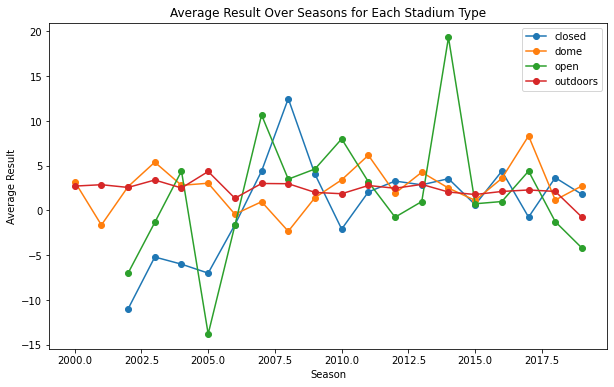

In [284]:
df["season"] = df["season"].round().astype(int)

average_results = df.groupby(["roof", "season"])["result"].mean().unstack()
plt.figure(figsize=(10, 6))
for roof_type in np.array(average_results.index):
    plt.plot(np.array(average_results.columns), average_results.loc[roof_type].values, marker='o', label=roof_type)

plt.title('Average Result Over Seasons for Each Stadium Type')
plt.xlabel('Season')
plt.ylabel('Average Result')
plt.legend()

In [285]:
average_results.index

Index(['closed', 'dome', 'open', 'outdoors'], dtype='object', name='roof')

### Takeaway of Data Section:
At this point, both Dataset \#1 and Dataset \#2 have 5104 regular games between 2000 and 2019 (inclusive). Due to the processes being used to clean the datasets being similar and both datatsets claiming to contain every NFL game from the years they cover, it is probable that these are the same 5104 games. Therefore, Datasets \#1 and \#2 can be used together to experiment with our research question and address a confounding variable, respectively.

## Exploratory Data Analysis


### Visualizations and Trends for Main Question

In this section, we'll look into the distributions (histograms) and relationships between some of the key variables in our data. From this, we start to see patterns of home teams generally/on average/in measures of center score higher and have better point margins than visiting teams. 

In [286]:

teams_list = list(team_abbreviations.keys())

In [287]:
# Create a new data frame with average scores for away and home games per team
home_team_avgs = []
away_team_avgs = []
team_avgs = pd.DataFrame(index=teams_list)
better_at_home_dict = {}
for team in teams_list:
    specified_home_team_avg = merged_final_df[merged_final_df['home_team'] == team]['home_score'].mean()
    specified_away_team_avg = merged_final_df[merged_final_df['away_team'] == team]['away_score'].mean()
    home_team_avgs.append(specified_home_team_avg)
    away_team_avgs.append(specified_away_team_avg)
    better_at_home_dict[team] = specified_home_team_avg > specified_away_team_avg

team_avgs['average_home_score'] = home_team_avgs
team_avgs['average_away_score'] = away_team_avgs

In [288]:
# Outputs a dictionary indicating whether a teams score on average was higher at home verses away
better_at_home_dict

{'Los Angeles Rams': False,
 'St. Louis Rams': True,
 'Los Angeles Chargers': True,
 'San Diego Chargers': True,
 'Houston Texans': True,
 'Tennessee Titans': True,
 'New York Jets': True,
 'Seattle Seahawks': True,
 'Philadelphia Eagles': True,
 'Detroit Lions': True,
 'Denver Broncos': True,
 'Tampa Bay Buccaneers': True,
 'Jacksonville Jaguars': True,
 'Baltimore Ravens': True,
 'San Francisco 49ers': True,
 'Carolina Panthers': False,
 'Arizona Cardinals': True,
 'Miami Dolphins': True,
 'Oakland Raiders': True,
 'Indianapolis Colts': True,
 'Green Bay Packers': True,
 'New York Giants': True,
 'Kansas City Chiefs': True,
 'New Orleans Saints': True,
 'Washington Redskins': True,
 'Atlanta Falcons': True,
 'Dallas Cowboys': True,
 'New England Patriots': True,
 'Cincinnati Bengals': True,
 'Pittsburgh Steelers': True,
 'Buffalo Bills': True,
 'Minnesota Vikings': True,
 'Chicago Bears': True,
 'Cleveland Browns': True}

In [289]:
# Plots horizontal bar plot per team specifying the averages for home and away
#ax = plt.plot(team_avgs, kind='barh', figsize=(15, 10))
#ax = team_avgs.plot(kind='barh', figsize=(15, 10))
#ax = team_avgs.plot(kind='barh')
#ax.legend(fontsize='small', loc='upper center')
#plt.title('Average Scores of Home and Away Teams for Each Team')
#plt.xlabel('Average Score')
#plt.ylabel('Team')
#plt.show()

In [290]:
team_avgs

,average_home_score,average_away_score
Los Angeles Rams,24.750000,25.968750
St. Louis Rams,23.171875,17.906250
Los Angeles Chargers,23.375000,23.291667
San Diego Chargers,25.301471,23.073529
Houston Texans,22.513889,19.208333
Tennessee Titans,22.743750,19.968750
New York Jets,21.187500,18.487500
Seattle Seahawks,25.237500,20.606250
Philadelphia Eagles,24.406250,23.981250
Detroit Lions,22.131250,19.037500


<AxesSubplot:>

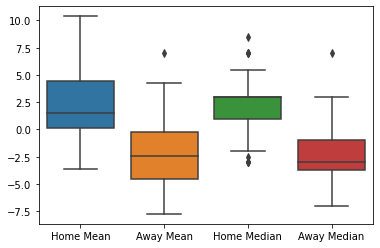

In [291]:
team_home_means = np.zeros(len(df['home_team'].unique()))
team_away_means = np.zeros(len(df['home_team'].unique()))
team_home_medians = np.zeros(len(df['home_team'].unique()))
team_away_medians = np.zeros(len(df['home_team'].unique()))
for i in range(len(df['home_team'].unique())):
    temp1 = df.loc[(df['home_team']==df['home_team'].unique()[i])]
    temp2 = df.loc[(df['away_team']==df['home_team'].unique()[i])]
    #print(temp1['result'].mean())
    team_home_means[i] = temp1['result'].mean()
    team_home_medians[i] = temp1['result'].median()
    team_away_means[i] = -1*temp2['result'].mean()
    team_away_medians[i] = -1*temp2['result'].median()
    #team_home_means = np.insert(team_home_means, temp1['result'].mean())
    #team_home_medians = np.insert(team_home_medians, temp1['result'].median())
    #team_away_means = np.insert(team_away_means, -1*temp2['result'].mean())
    #team_away_medians = np.insert(team_away_medians, -1*temp2['result'].median())
#tmp = pd.DataFrame(team_home_means)
team_home_means = pd.Series(list(team_home_means))
team_away_means = pd.Series(list(team_away_means))
team_home_medians = pd.Series(list(team_home_medians))
team_away_medians = pd.Series(list(team_away_medians))
centers = pd.concat([team_home_means, team_away_means, team_home_medians, team_away_medians], keys=['Home Mean', 'Away Mean', 'Home Median', 'Away Median'], axis=1)
assert len(team_home_means)==len(team_home_medians)==len(team_away_means)==len(team_away_medians)==len(df['home_team'].unique())
centers
pd.DataFrame.iteritems = pd.DataFrame.items
sns.boxplot(data=centers)

Note that both the mean and median points difference in score (from the perspective of the home team) are > 0. This central tendency indicates that teams tend to win by greater margins on average when they're the home team

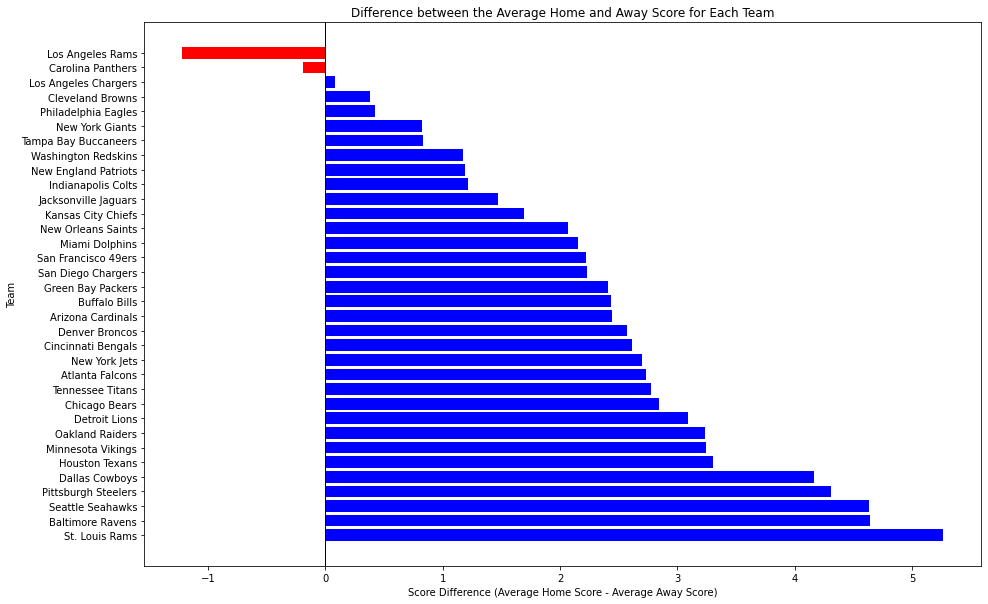

In [292]:
# Calculate the difference between home and away scores for each team
team_avgs['Difference'] = team_avgs['average_home_score'] - team_avgs['average_away_score']

# Sort the DataFrame by the difference
team_avgs = team_avgs.sort_values(by='Difference', ascending=False)

# Plotting a horizontal bar plot 
fig, ax = plt.subplots(figsize=(15, 10))

colors = np.where(team_avgs['Difference'] >= 0, 'blue', 'red')  
ax.barh(team_avgs.index, team_avgs['Difference'], color=colors)

plt.axvline(0, color='black', linestyle='-', linewidth=1) 

plt.title('Difference between the Average Home and Away Score for Each Team')
plt.xlabel('Score Difference (Average Home Score - Average Away Score)')
plt.ylabel('Team')

plt.show()

In [293]:
# Average difference between home games and away games per team 
team_diff = pd.DataFrame(index=teams_list)
lst_home_diff = []
lst_away_diff = []
for team in teams_list:
    specified_home_team_diff = merged_final_df[merged_final_df['home_team'] == team]['points_diff'].mean()
    lst_home_diff.append(specified_home_team_diff)
    specified_away_team_diff = merged_final_df[merged_final_df['away_team'] == team]['points_diff'].mean()
    lst_away_diff.append(specified_away_team_diff)
    

In [294]:
team_diff['avg_diff (home)'] = lst_home_diff
team_diff['avg_diff (away)'] = lst_away_diff

In [295]:
#ax = team_diff.plot(kind='barh', color = ['blue','orange'], figsize=(15, 10))
#ax.legend(fontsize='small', loc='upper left')
#plt.title('Average Score Difference (home - away) When Played at Home and Away per Team ')
#plt.xlabel('Average Score')
#plt.ylabel('Team')
#plt.show()

### Tests/Inference for Main Question:

In this section, we'll expand upon the patterns we observed in the last section, using statistical tests to infer about the extent to which the data supports our main research question. We use a permutation test, t tests, and a limited linear regression. These tests seem to provide strong evidence that home field advantage exists, consistently showing that the distributions of home scores are different from the away scores by a statistically significant amount.

In [296]:
# Computes the observered test statistic 
def compute_test_statistic(df):
    return np.mean(df['home_score']) - np.mean(df['away_score']) 


In [297]:
# Observed test statistic
observed_statistic = compute_test_statistic(merged_final_df) 


In [298]:
# Perform permutation test
permutation_statistics = []
num_permutations = 50
for i in range(num_permutations):
    # Shuffle the scores between home and away
    shuffled_df = merged_final_df[['home_score', 'away_score']].apply(np.random.permutation, axis=1)
    
    # Formats the shuffled scores back into data frame to calculate the statistic 
    x =  merged_final_df[['home_score', 'away_score']].apply(np.random.permutation, axis=1)
    temp = pd.DataFrame(x)
    temp[['home_score', 'away_score']] = temp[0].apply(lambda x: pd.Series(x))
    temp = temp.drop(columns =[0])
    shuffled_df = temp

    # Calculate the test statistic based on shuffled labels
    permuted_statistic = shuffled_df['home_score'].mean() - shuffled_df['away_score'].mean()
    permutation_statistics.append(permuted_statistic) 


In [299]:
# Calculate the p-value
p_value = (np.abs(permutation_statistics) >= np.abs(observed_statistic)).mean() 


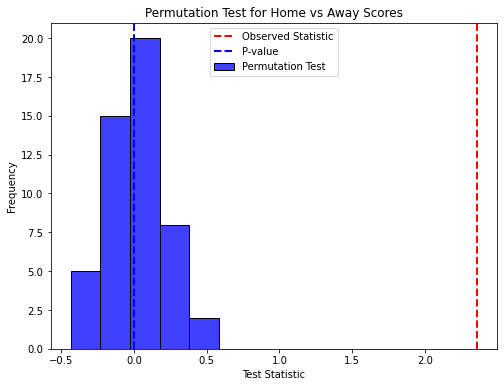

In [300]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(permutation_statistics, bins=5, color='blue', label='Permutation Test')
plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.axvline(p_value, color='blue', linestyle='dashed', linewidth=2, label='P-value')
plt.title('Permutation Test for Home vs Away Scores')
plt.xlabel('Test Statistic')
plt.ylabel('Frequency')
plt.legend()
plt.show() 


In [301]:
# Results
print("Observed Test Statistic:", observed_statistic)
print("P-value:", p_value)

alpha = 0.05

# Compare p-value to significance level
if p_value <= alpha:
    print(f"Reject the null hypothesis. Observed Statistic: {observed_statistic}, P-value: {p_value}")
else:
    print(f"Fail to reject the null hypothesis. Observed Statistic: {observed_statistic}, P-value: {p_value}") 

Observed Test Statistic: 2.356387147335422
P-value: 0.0
Reject the null hypothesis. Observed Statistic: 2.356387147335422, P-value: 0.0


The results show that there is a statistically significant difference between home and away scores. Sinc our p-value is 0.0 < 0.05 (common threshold to test statistical significance) this means that we can reject the null hypothesis in order to suggest that there is a statstical significant difference in scores between home and away teams. The test statistic used is the difference in mean scores between the home and away teams. The observed test statistic based on the data given is about 2.35. We ran 10 iterations where random rows of away and home scores were shuffled and a the test statistic was calculated based on the new permuated data. We then calculated the p-value which showed on average how many of the permuated test statistics (under random chance) were greater than the observed test statistic. The p-value of 0.0 showed that the observed test static is very unlikely to happen by chance alone based on the null hypothesis.

In [302]:
from scipy.stats import ttest_ind

# t test on individual scores of home vs away
t_stat_home, p_value_home = ttest_ind(df['home_score'], df['away_score'])

print(f"T-statistic for Home Scores: {t_stat_home}")
print(f"P-value for Home Scores: {p_value_home}")

if p_value_home < 0.05:
    print("The difference in scores between home and away teams is statistically significant for home scores.")
else:
    print("There is no significant difference in scores between home and away teams for home scores.")

t_stat_away, p_value_away = ttest_ind(df['away_score'], df['home_score'])

print(f"\nT-statistic for Away Scores: {t_stat_away}")
print(f"P-value for Away Scores: {p_value_away}")

if p_value_away < 0.05:
    print("The difference in scores between home and away teams is statistically significant for away scores.")
else:
    print("There is no significant difference in scores between home and away teams for away scores.")

T-statistic for Home Scores: 11.62572786330239
P-value for Home Scores: 4.783628932704083e-31
The difference in scores between home and away teams is statistically significant for home scores.

T-statistic for Away Scores: -11.62572786330239
P-value for Away Scores: 4.783628932704083e-31
The difference in scores between home and away teams is statistically significant for away scores.


In [303]:
# t tests for each team's mean/median home vs away
t_val1, p_val1 = stats.ttest_ind(team_home_means, team_away_means)
t_val2, p_val2 = stats.ttest_ind(team_home_medians, team_away_medians)
print("Mean p: ", p_val1)
print("Median p: ", p_val2) 


Mean p:  6.397411498321998e-07
Median p:  8.330001855682156e-07


In [304]:
# limited linear regression that could be considered useful for the purpose of showing the amount of change in point 
# margin that being home is predicted to cause
is_home = []
result = []
for index, row in df.iterrows():
    is_home.append(1)
    result.append(row['result'])
    is_home.append(0)
    result.append(-1*row['result'])
is_home = pd.Series(is_home)
result = pd.Series(result)
results = pd.concat([is_home, result], keys=['Home', 'Result'], axis=1) 


In [305]:
outcome_1, predictors_1 = patsy.dmatrices("Result ~ Home", results)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit() 


In [306]:
print(res_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Result   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     260.4
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           7.38e-58
Time:                        07:38:29   Log-Likelihood:                -41959.
No. Observations:               10208   AIC:                         8.392e+04
Df Residuals:                   10206   BIC:                         8.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3564      0.207    -11.410      0.0

### Assessing Impact of Potential Confounding Variable:

Here, we starting visualizing and testing whether other variables (other than home team) had a significant (confounding) effect on the score margin in order to challenge our findings in the previous section to reduce doubt that the pattern observed was misleading.

Text(0.5, 1.0, 'Does Stadium Type Affect Margin of Victory or Loss?')

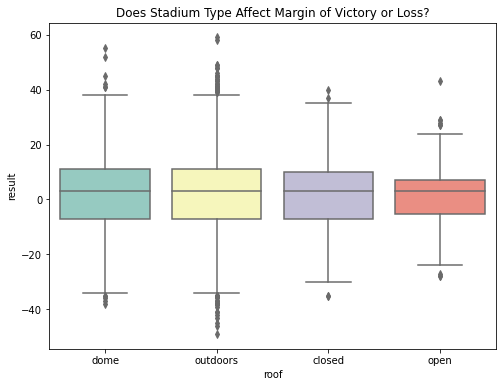

In [307]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="roof", y="result", data=df, palette="Set3")
plt.title('Does Stadium Type Affect Margin of Victory or Loss?')

In [308]:
temp = merged_final_df.copy()
temp = temp[temp['tie'] == False]
temp['win or loss'] = temp['points_diff'].apply(lambda x: x > 0)

In [309]:
px.histogram(temp, x='home', color='win or loss', histnorm='probability', marginal='box',
             title="Distribution of home attendance between final result is win for home or loss for home", barmode='overlay', opacity=0.7)

In [310]:
print("KS-statistic for the two distribution: ")
ks_2samp(temp.loc[temp['win or loss'] == True, 'home'], temp.loc[temp['win or loss'] == False, 'home']).pvalue

KS-statistic for the two distribution: 


7.146056094642361e-06

In [311]:
temp2 = temp.copy()
px.histogram(temp2, x='away', color='win or loss', histnorm='probability', marginal='box',
             title="Distribution of away attendance between home team win or loss", barmode='overlay', opacity=0.7)

In [312]:
print("KS-statistic for the two distribution: ")
ks_2samp(temp2.loc[temp2['win or loss'] == True, 'away'], temp.loc[temp2['win or loss'] == False, 'away']).pvalue

KS-statistic for the two distribution: 


0.0074370335476861005

In [313]:
# Here, we analyze the proportion of attendance instaed of the aboslute number

temp3 = temp.copy()
temp3['home_prop'] = (temp['home'] / (temp['home'] + temp['away'])) * 100
temp3['away_prop'] = 100 - temp3['home_prop']
temp3

,year,week,winner,tie,date,points_diff,home,away,weekly_attendance,game_id,season,game_type,gameday,away_score,home_score,location,result,overtime,spread_line,div_game,roof,temp,wind,stadium_id,stadium,point_differential,combined_score,total_seats,home_team,away_team,win or loss,home_prop,away_prop
0,2000,01,Minnesota Vikings,False,September 3,3,513322,515940,64104.0,2000_01_CHI_MIN,2000,REG,2000-09-03,27.0,30.0,Home,3.0,0.0,4.5,1,dome,NaN,NaN,MIN00,Hubert H. Humphrey Metrodome,3.0,57.0,1029262,Minnesota Vikings,Chicago Bears,True,49.872821,50.127179
1,2000,01,Indianapolis Colts,False,September 3,-13,631365,483907,78357.0,2000_01_IND_KC,2000,REG,2000-09-03,27.0,14.0,Home,-13.0,0.0,-3.5,0,outdoors,90.0,5.0,KAN00,Arrowhead Stadium,-13.0,41.0,1115272,Kansas City Chiefs,Indianapolis Colts,False,56.610854,43.389146
2,2000,01,Washington Redskins,False,September 3,3,647424,526908,80257.0,2000_01_CAR_WAS,2000,REG,2000-09-03,17.0,20.0,Home,3.0,0.0,10.5,0,outdoors,80.0,0.0,WAS00,FedExField,3.0,37.0,1174332,Washington Redskins,Carolina Panthers,True,55.131258,44.868742
3,2000,01,Atlanta Falcons,False,September 3,8,422814,541765,54626.0,2000_01_SF_ATL,2000,REG,2000-09-03,28.0,36.0,Home,8.0,0.0,6.5,1,dome,NaN,NaN,ATL00,Georgia Dome,8.0,64.0,964579,Atlanta Falcons,San Francisco 49ers,True,43.834046,56.165954
4,2000,01,Baltimore Ravens,False,September 3,-16,440426,546611,55049.0,2000_01_BAL_PIT,2000,REG,2000-09-03,16.0,0.0,Home,-16.0,0.0,-2.5,1,outdoors,74.0,8.0,PIT99,Three Rivers Stadium,-16.0,16.0,987037,Pittsburgh Steelers,Baltimore Ravens,False,44.621022,55.378978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,2019,17,Philadelphia Eagles,False,December 29,-17,597316,545793,75029.0,2019_17_PHI_NYG,2019,REG,2019-12-29,34.0,17.0,Home,-17.0,0.0,-4.0,1,outdoors,42.0,5.0,NYC01,MetLife Stadium,-17.0,51.0,1143109,New York Giants,Philadelphia Eagles,False,52.253635,47.746365
5100,2019,17,Dallas Cowboys,False,December 29,31,727432,561595,90646.0,2019_17_WAS_DAL,2019,REG,2019-12-29,16.0,47.0,Home,31.0,0.0,13.0,1,closed,NaN,NaN,DAL00,AT&T Stadium,31.0,63.0,1289027,Dallas Cowboys,Washington Redskins,True,56.432643,43.567357
5101,2019,17,Baltimore Ravens,False,December 29,18,565020,526343,70695.0,2019_17_PIT_BAL,2019,REG,2019-12-29,10.0,28.0,Home,18.0,0.0,-2.0,1,outdoors,46.0,7.0,BAL00,M&T Bank Stadium,18.0,38.0,1091363,Baltimore Ravens,Pittsburgh Steelers,True,51.771959,48.228041
5102,2019,17,Los Angeles Rams,False,December 29,7,582325,565390,68665.0,2019_17_ARI_LA,2019,REG,2019-12-29,24.0,31.0,Home,7.0,0.0,7.0,1,outdoors,62.0,0.0,LAX99,Los Angeles Memorial Coliseum,7.0,55.0,1147715,Los Angeles Rams,Arizona Cardinals,True,50.737770,49.262230


In [314]:
def create_kde_plotly(df, group_col, group1, group2, vals_col, title=''): 
    fig = ff.create_distplot(
    hist_data=[df.loc[df[group_col] == group1, vals_col], df.loc[df[group_col] == group2, vals_col]], group_labels=[group1, group2],
    show_rug=False, show_hist=False,
    colors=['#ef553b', '#636efb'],
    )
    return fig.update_layout(title=title)

In [315]:
px.histogram(temp3, x='home_prop', color='win or loss', histnorm='probability', marginal='box',
             title="Distribution of proportion home attendance between home team win or loss", barmode='overlay', opacity=0.7)

In [316]:
create_kde_plotly(temp3, 'win or loss', True, False, 'home_prop', 'Distribution of proportion of home attendance for home win or loss')

In [317]:
print('KS-statistics of two distributions:')
ks_2samp(temp3.loc[temp3['win or loss'] == True, 'home_prop'], temp3.loc[temp3['win or loss'] == False, 'home_prop']).pvalue 


KS-statistics of two distributions:


0.0015293055154862456

In [318]:
# Now, we do the permutation to the difference in number of attendance from home team and away team
test2_atten =  complete_df.copy()
test2_atten['home win or not'] = test2_atten['points_diff'].apply(lambda x: x > 0)

test2_atten = test2_atten[['points_diff', 'home', 'away', 'home win or not']]
test2_atten['attandence_diff'] = test2_atten['home'] - test2_atten['away']
test2_atten 


,points_diff,home,away,home win or not,attandence_diff
0,3,513322,515940,True,-2618
1,-13,631365,483907,False,147458
2,3,647424,526908,True,120516
3,8,422814,541765,True,-118951
4,-16,440426,546611,False,-106185
...,...,...,...,...,...
5099,-17,597316,545793,False,51523
5100,31,727432,561595,True,165837
5101,18,565020,526343,True,38677
5102,7,582325,565390,True,16935


In [319]:
attendance_observed_stats = test2_atten.groupby('home win or not')['attandence_diff'].mean().diff().iloc[-1]
print(f'The observed_stats is home team attendance is {attendance_observed_stats} people more than away team attendance on average') 


The observed_stats is home team attendance is 4171.0714397766915 people more than away team attendance on average


In [320]:
attendance_sample_stats = []

for i in range(10000):
    test2_atten['permuated'] = np.random.permutation(test2_atten['attandence_diff'])
    attendance_sample_stats.append(test2_atten.groupby('home win or not')['permuated'].mean().diff().iloc[-1])

p_val = np.mean([i > attendance_observed_stats for i in attendance_sample_stats])
print(f'the pvalue of our permutation is {p_val}') 


the pvalue of our permutation is 0.0165


In [321]:
p_value_data = pd.DataFrame({'aboslute difference in attendance': attendance_sample_stats})
fig = px.histogram(p_value_data, x = 'aboslute difference in attendance', histnorm='probability')
fig.add_vline(x=attendance_observed_stats, line_color='red')
fig 


In [322]:
# We can also do permutation test on the proportion difference about the attendance from home team and away team
test2_atten['home_prop'] = (test2_atten['home'] / (test2_atten['home'] + test2_atten['away'])) * 100
test2_atten['away_prop'] = 100 - test2_atten['home_prop']
test2_atten 


,points_diff,home,away,home win or not,attandence_diff,permuated,home_prop,away_prop
0,3,513322,515940,True,-2618,128879,49.872821,50.127179
1,-13,631365,483907,False,147458,6393,56.610854,43.389146
2,3,647424,526908,True,120516,-91389,55.131258,44.868742
3,8,422814,541765,True,-118951,31688,43.834046,56.165954
4,-16,440426,546611,False,-106185,-103680,44.621022,55.378978
...,...,...,...,...,...,...,...,...
5099,-17,597316,545793,False,51523,-91389,52.253635,47.746365
5100,31,727432,561595,True,165837,42785,56.432643,43.567357
5101,18,565020,526343,True,38677,7907,51.771959,48.228041
5102,7,582325,565390,True,16935,-44181,50.737770,49.262230


In [323]:
mean_stats = test2_atten.groupby('home win or not')[['home_prop', 'away_prop']].mean()
prop_observed_stats = mean_stats['home_prop'] - mean_stats['away_prop']
prop_observed_stats = prop_observed_stats.diff().iloc[-1]
print(f'The observed statistics is that attendance from home team is {prop_observed_stats}% more than attendance from away team on average') #
observed_stats_prop = []
test_df = test2_atten.copy()

for i in range(10000):
    test_df['permuated_home_prop'] = np.random.permutation(test_df['home_prop'])
    test_df['permuated_away_prop'] = 100 - test_df['permuated_home_prop']

    mean_stats_test = test_df.groupby('home win or not').mean()

    observed_stats_prop.append((mean_stats_test['permuated_home_prop'] - mean_stats_test['permuated_away_prop']).diff().iloc[-1])

p_val = np.mean([ prop_observed_stats < i for i in observed_stats_prop])
print(f'The pvalue for this permutation is {1-p_val}') 


The observed statistics is that attendance from home team is 0.48008317315007787% more than attendance from away team on average
The pvalue for this permutation is 0.9938


In [324]:
p_value_data = pd.DataFrame({'Proportion difference in attendance': observed_stats_prop})
fig = px.histogram(p_value_data, x = 'Proportion difference in attendance', histnorm='probability')
fig.add_vline(x=prop_observed_stats, line_color='red')
fig 


In [325]:
# Now, we perform Linear Regression to see if there's any linear relationships between the above variables we have analyzed

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

outcome, predictors = patsy.dmatrices('points_diff ~ attandence_diff', test2_atten)
model = sm.OLS(outcome, predictors) 


In [326]:
result = model.fit()

print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:            points_diff   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.11
Date:                Thu, 30 Nov 2023   Prob (F-statistic):            0.00148
Time:                        07:38:56   Log-Likelihood:                -20974.
No. Observations:                5104   AIC:                         4.195e+04
Df Residuals:                    5102   BIC:                         4.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3564      0.206     

### Takeaways From EDA Section:

From our visualizations and tests of home team and point margin, we obtained strong results indicating a positive relationship between being home team and score margin. Based on the visualizations and tests run on potential confounding variables (like match attendance and stadium type), it seems unlikely that these variables are having a significant confounding effect on the relationship we observed between home field and score margin. Therefore, at this stage we feel that the data indicates that being the home team truly does cause a significant improvement in expected score margin.

# Ethics & Privacy

Although the concept of home team advantage is relevant across sports and skill levels, we decided to study the highly visible NFL to get the most comprehensive, most reputable, and least biased data possible. There are few privacy or terms of use issues present in our proposed data because the data of NFL matches and players are publicly available. However, in the second dataset, people did not necessarily know that their attendance was being recorded, but their attendance is not attached to any identifying information so this should not be a major ethical issue. A potential unintended consequence is that if it becomes common knowledge that there is a definitive/significant home-field advantage effect, teams could also try to exploit this. A potential bias in our first dataset is that it includes neutral games where neither team had home-field advantage; this could be irrelevant or distracting to our question, so we plan to remove these observations from the data. Additionally, there may be some sources of bias for home-team advantage within NFL data due to home stadiums being different sizes, containing different mixes of home/visiting fans, and other metrics that are difficult to measure and/or account for. In terms of equitable impact, the impact of our analysis could be potentially limited because of the significant differences/biases between NFL matches and matches in other sports/leagues, so it is unlikely that our results could directly be applied to those other populations. We can deal with detecting specific biases before analysis by choosing broad datasets that include every game and stat possible. We can detect specific biases during and after analysis by checking the data for outliers, unexpected patterns, and confounding variables that demonstrate the presence of significant bias and then addressing those issues as they arise. We addressed other potential bias issues by targeting data sources that contain comprehensive match results (they leave nothing out for the season they were played in), unaffiliated with a specific team or stadium.


# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* In our team, each group member will show respect to each other, no matter what kind of conflicts you have with others. 
* Each person in our group should be responsible and diligent to tackle the tasks that they are assigned. 
* We shall assign tasks to each member that match their backgrounds and strengths best with equal workloads. If anyone has any difficulties in their work and can’t solve these obstacles by themselves, they will reach out to others for help as soon as possible. 
* When conflict arises, we will work as a team, analyzing the pros and cons of each strategy and choosing the best solution. 
* All members in our group should actively participate in discussions, though absence due to time conflict or emergency is understandable. In the discussion, everyone should listen carefully when other members are sharing their ideas. 
* Each member in our group should finish their tasks on time. If anyone can’t finish the work before the deadline we agreed on, notification and explanation in advance is required. 
* Before the submission of each deadline (proposal, checkin, and final project), each member is responsible to look over the overall work we have done and fix any typos, inappropriate expressions, and coding errors in our work. 


# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/30  |  7 PM | Brainstorm topics + questions  | Decide on final project topic, question(s), and hypothesis | 
| 10/31  |  4 PM |  Prepare drafts of each section - each person does one | Go over drafts, edit, finalize, and submit proposal (due 11/1) | 
| 11/7  | 4:15 PM  | Look for datasets - 1+ each | Discuss wrangling and potential analytical approaches, assign group members to lead certain pieces   |
| 11/13  | 7 PM  | Import data, remove unnecessary data | Review/edit datasets, submit data checkpoint (due 11/15)   |
| 11/20  | 7 PM  | Finalize wrangling/EDA, start analyzing | Discuss and edit analysis |
| 11/27  | 7 PM  | Edit analysis independently | Submit EDA checkpoint (due 11/29) |
| 12/4  | 7 PM  | Finish analysis, draft results/conclusion/discussion | Discuss + edit full project |
| 12/11  | 7 PM  | Final edits | Turn in final project, video, + last group progress survey (due 12/13) |